In [1]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv('fashion-mnist_train.csv')
ted = pd.read_csv('fashion-mnist_test.csv')

In [3]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

ted = np.array(ted)
m_test, n_test = ted.shape
np.random.shuffle(ted)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


data_test = ted.T
Y_test = data_test[0]
X_test = data_test[1:n_test]
X_test = X_test / 255.
_,m_test = X_test.shape

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_test, X_test

(array([3, 7, 0, ..., 0, 2, 5], dtype=int64),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [6]:
Y_train, X_train

(array([0, 7, 7, ..., 8, 7, 6], dtype=int64),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

In [7]:
def init_params():
    W1 = np.random.rand(32, 784) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(32, 32) - 0.5
    b2 = np.random.rand(32, 1) - 0.5
    W3 = np.random.rand(10, 32) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3, dZ3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3 
    b3 = b3 - alpha * db3   
    return W1, b1, W2, b2, W3, b3


In [8]:
def compute_loss(y_true, y_pred):
    #y_pred= one_hot(y_pred)
    loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / len(y_true)
    return loss

def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    cost_history = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3, dZ3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        cost_history.append(compute_loss(one_hot(Y), A3))
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 50 == 0:
            print("Epoch: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3, cost_history

In [9]:
W1, b1, W2, b2, W3, b3, cost_history = gradient_descent(X_train, Y_train, 0.25, 500)

Epoch:  0
[4 9 0 ... 9 4 8] [0 7 7 ... 8 7 6]
0.15094915254237287
Epoch:  50
[0 9 7 ... 8 9 2] [0 7 7 ... 8 7 6]
0.6646779661016949
Epoch:  100
[0 7 7 ... 8 9 2] [0 7 7 ... 8 7 6]
0.7286440677966102
Epoch:  150
[0 5 7 ... 8 9 2] [0 7 7 ... 8 7 6]
0.7558474576271187
Epoch:  200
[0 7 7 ... 8 7 2] [0 7 7 ... 8 7 6]
0.7774915254237288
Epoch:  250
[0 7 7 ... 8 7 2] [0 7 7 ... 8 7 6]
0.7873050847457627
Epoch:  300
[0 7 7 ... 8 7 2] [0 7 7 ... 8 7 6]
0.7994915254237288
Epoch:  350
[0 7 7 ... 8 7 2] [0 7 7 ... 8 7 6]
0.8059661016949152
Epoch:  400
[0 7 7 ... 8 7 2] [0 7 7 ... 8 7 6]
0.8098135593220339
Epoch:  450
[0 7 7 ... 8 7 2] [0 7 7 ... 8 7 6]
0.815677966101695


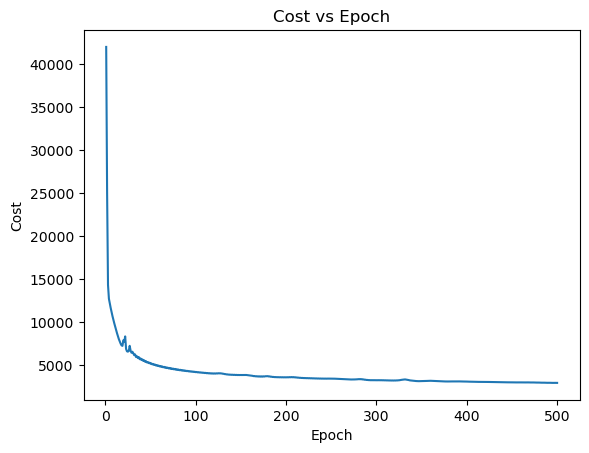

In [10]:
plt.plot(range(1, len(cost_history) + 1), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.show()

In [11]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


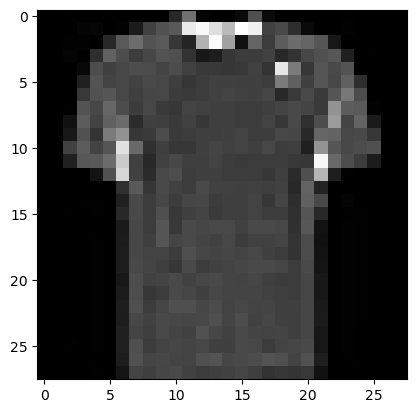

Prediction:  [7]
Label:  7


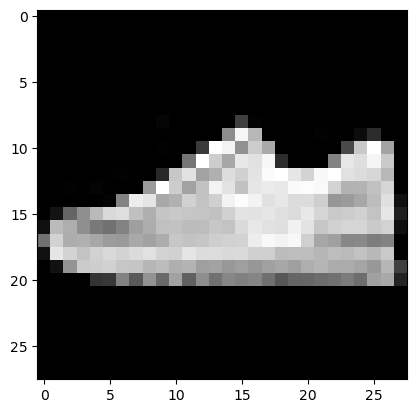

Prediction:  [6]
Label:  6


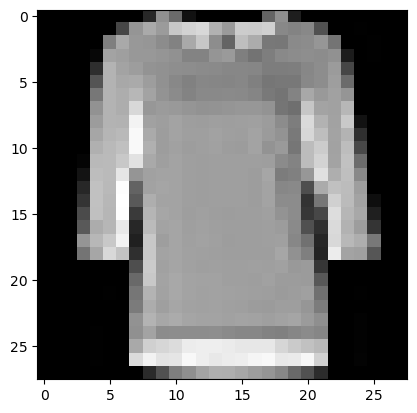

Prediction:  [8]
Label:  8


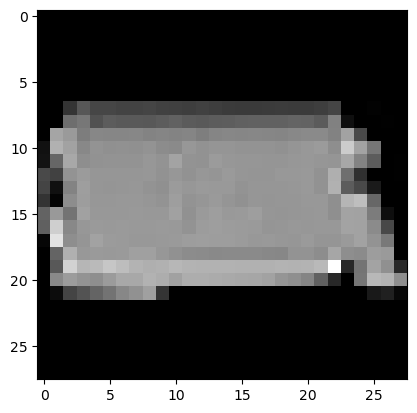

Prediction:  [6]
Label:  6


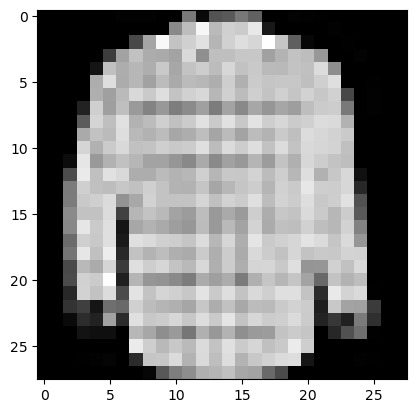

Prediction:  [2]
Label:  2


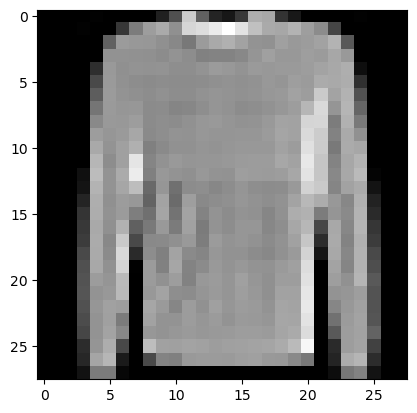

Prediction:  [8]
Label:  8


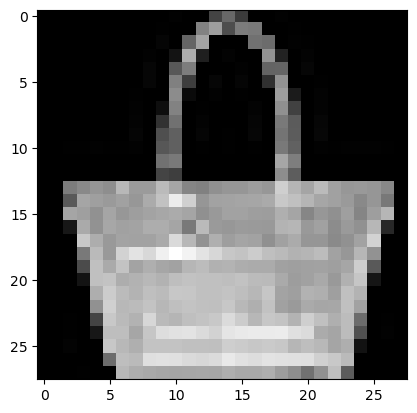

Prediction:  [4]
Label:  4


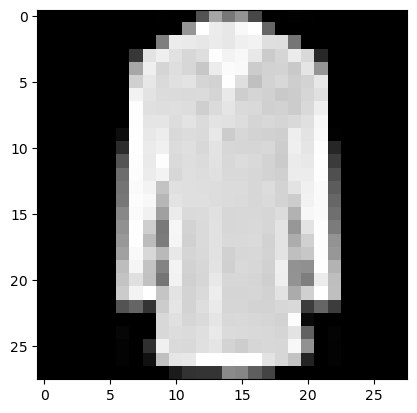

Prediction:  [3]
Label:  3


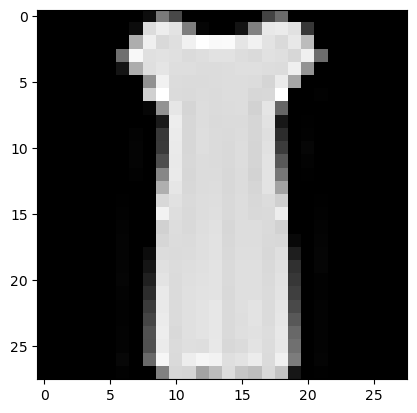

Prediction:  [1]
Label:  1


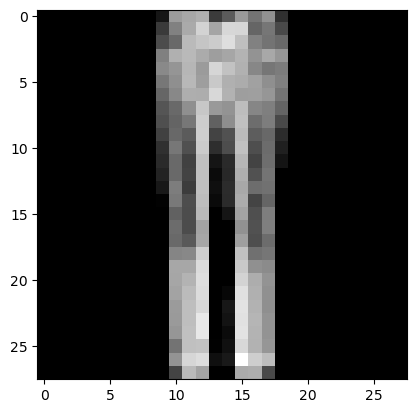

Prediction:  [8]
Label:  8


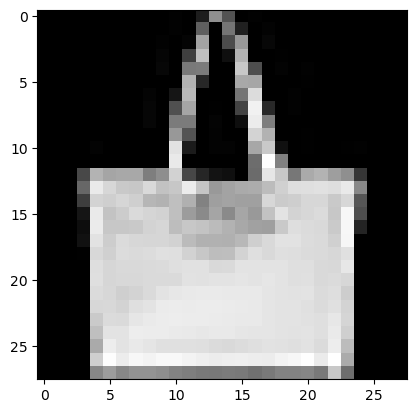

Prediction:  [8]
Label:  8


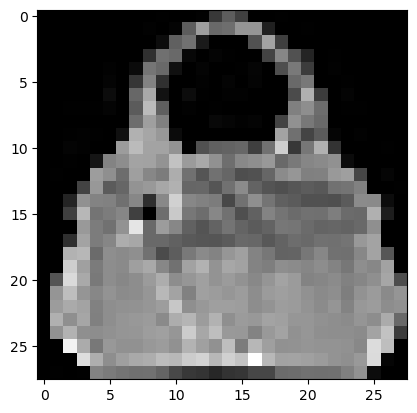

Prediction:  [7]
Label:  5


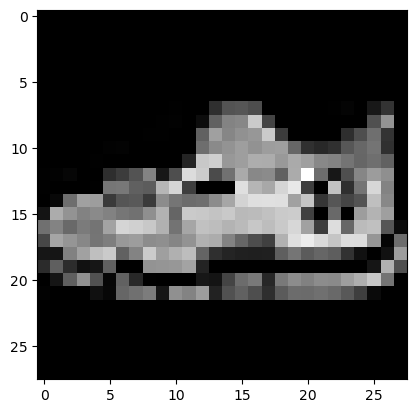

Prediction:  [9]
Label:  9


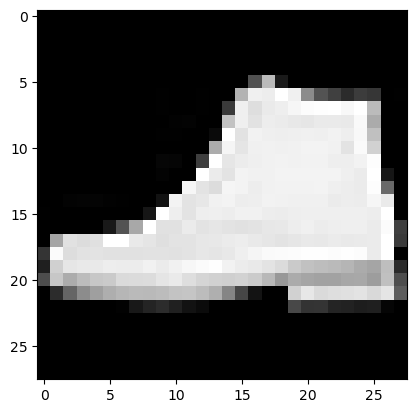

Prediction:  [2]
Label:  6


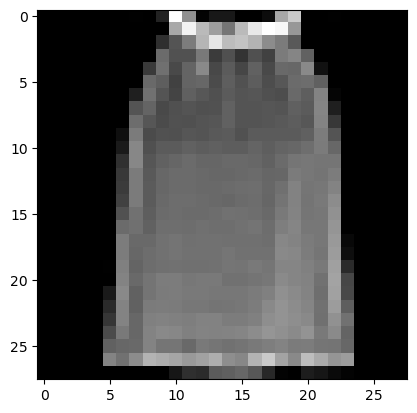

Prediction:  [6]
Label:  2


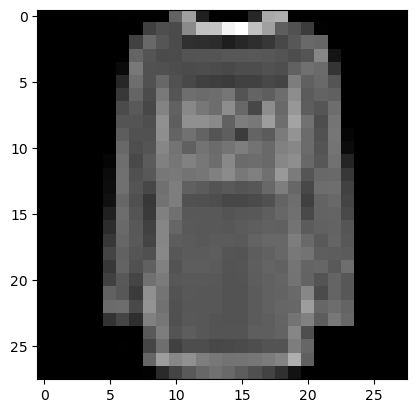

Prediction:  [4]
Label:  3


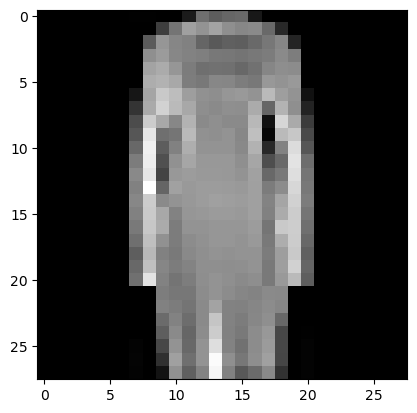

Prediction:  [7]
Label:  5


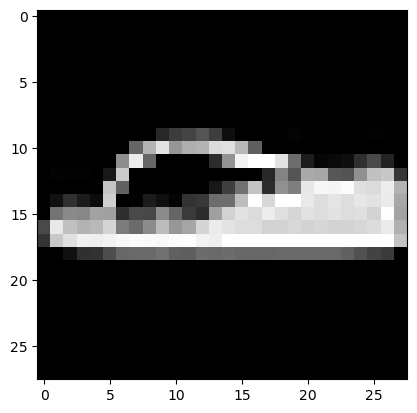

Prediction:  [1]
Label:  1


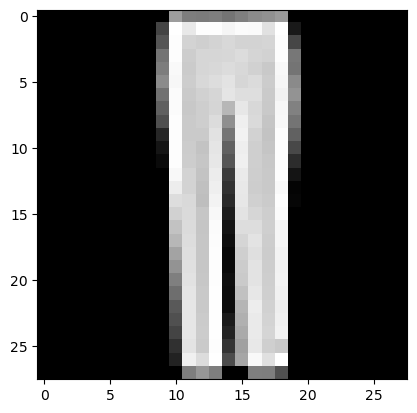

Prediction:  [3]
Label:  4


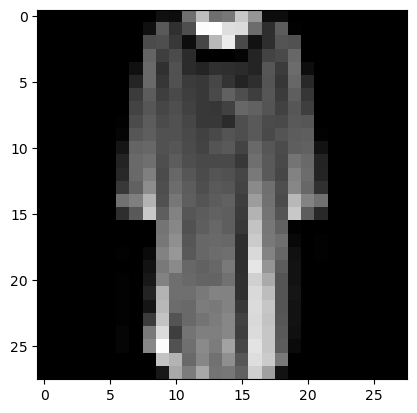

Prediction:  [7]
Label:  7


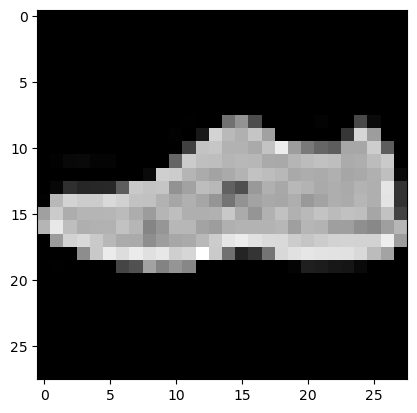

Prediction:  [3]
Label:  3


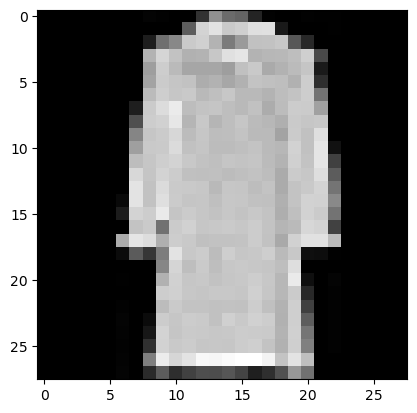

Prediction:  [3]
Label:  4


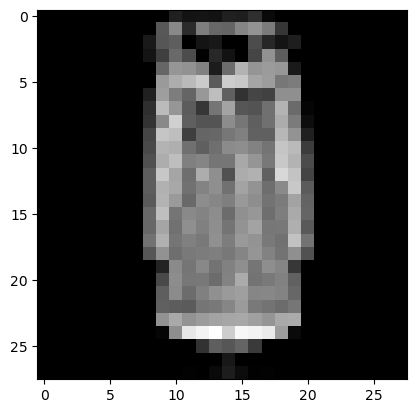

Prediction:  [7]
Label:  5


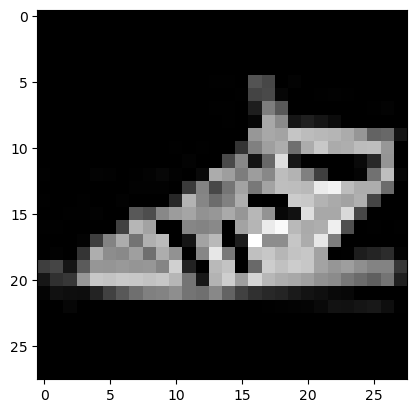

Prediction:  [4]
Label:  4


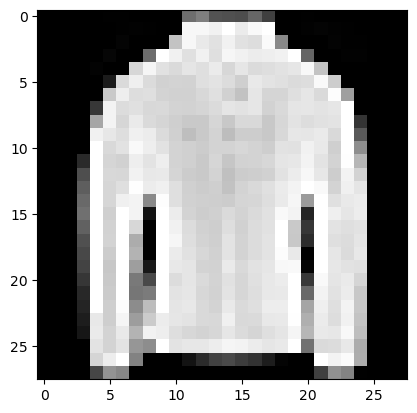

Prediction:  [4]
Label:  2


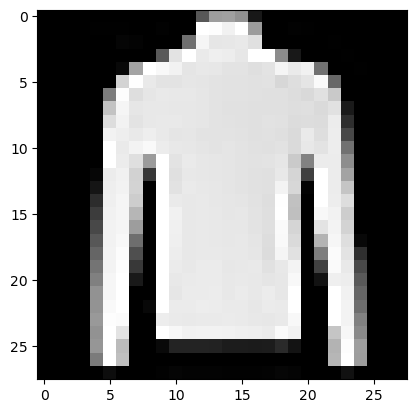

Prediction:  [8]
Label:  8


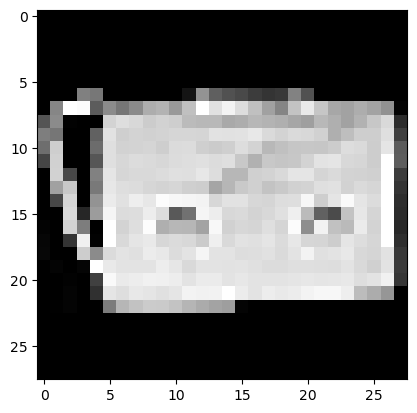

Prediction:  [8]
Label:  8


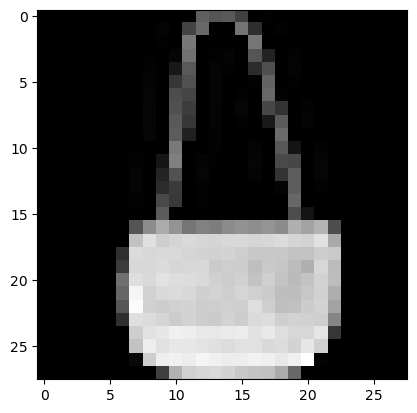

Prediction:  [9]
Label:  9


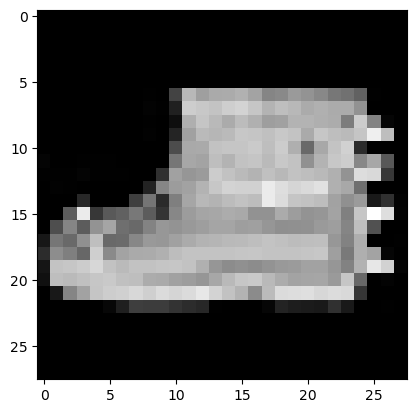

Prediction:  [7]
Label:  7


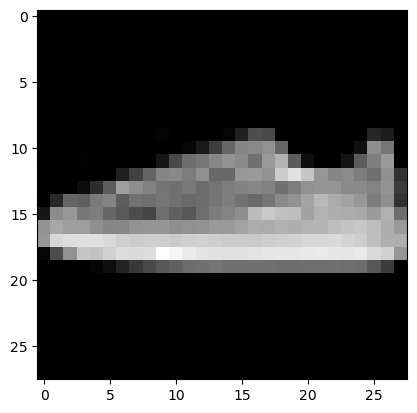

In [12]:
for i in range(58999):
    if i % 2000 == 0:
        test_prediction(i, W1, b1, W2, b2, W3, b3)

In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
print(f"Validation Set Metrics:\n\nAccuracy: {accuracy_score(dev_predictions, Y_dev)}")
print(f"Precision: {precision_score(dev_predictions, Y_dev, average = 'macro')}")
print(f"Recall: {recall_score(dev_predictions, Y_dev, average = 'macro')}")
print(f"Macro F1 Score: {f1_score(dev_predictions, Y_dev, average = 'macro')}")
print(f"Micro F1 Score: {f1_score(dev_predictions, Y_dev, average = 'micro')}")

Validation Set Metrics:

Accuracy: 0.817
Precision: 0.8193263807148187
Recall: 0.8204517243997447
Macro F1 Score: 0.8188031632787851
Micro F1 Score: 0.817


In [14]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)
print(f"Test Set Metrics:\nAccuracy: {accuracy_score(test_predictions, Y_test)}")
print(f"Precision: {precision_score(test_predictions, Y_test, average = 'macro')}")
print(f"Recall: {recall_score(test_predictions, Y_test, average = 'macro')}")
print(f"Macro F1 Score: {f1_score(test_predictions, Y_test, average = 'macro')}")
print(f"Micro F1 Score: {f1_score(test_predictions, Y_test, average = 'micro')}")

[1 7 6 ... 0 2 5] [3 7 0 ... 0 2 5]
Test Set Metrics:
Accuracy: 0.819
Precision: 0.8190000000000002
Recall: 0.8216872303478633
Macro F1 Score: 0.8187525508464952
Micro F1 Score: 0.819


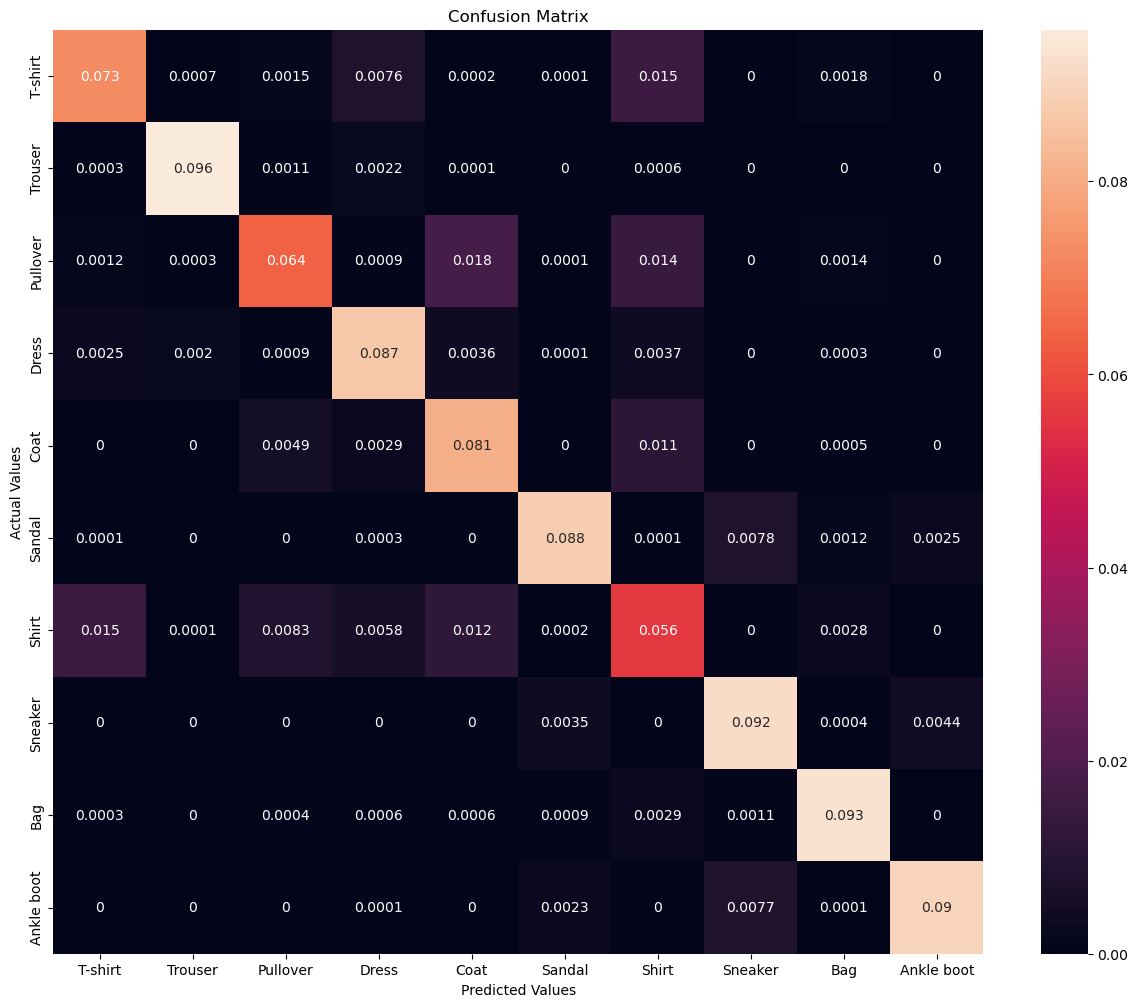

In [15]:
cm = confusion_matrix(Y_test, test_predictions, normalize = "all")
cm_df = pd.DataFrame(cm,
                     index = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"], 
                     columns = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])


plt.figure(figsize=(15,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()